# Tutorial 7.1: The Inhibition-Stabilized Circuit
### Neuroscience goal:
- understand how constant input current can shift a circuit into the inhibition-stabilized regime
- understand how bistability can arise between states of low firing rate
### Computational goal:
- gain more experience connecting circuits and simulating firing-rate models with different types of f-I curve
- use the sign function and ensure bounds in rate

### Overview
- will produce a model of an excitatory unit coupled to an inhibitory unit using a firing-rate model for each unit's activity
- excitatory unit will have a quadratric firing curve, with the property that its gradient is low at low rates
    - meaning the effective excitatory feedback can be relatively weak and lead to stability
    - the gradient increases at high rates, increasing the effective excitatory feedbcak to a point of instability
- this circuit requires inhibition for stbaility at high rates - where it can be in an inhibition-stabilized regime - but not at low rates
- will see how dynamical regime of circuit depends on time constants
- couple two excitatory-inhibitory pairs to produce a bistable circuit with distinct states of low activity

In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Part A
- simulate the activity of an excitatory unit of rate $r_E$, coupled to an inhibitory unit of rate $r_I$
- firing rates are:

$ \tau_E \frac{dr_E}{dt} = -r_E + \alpha_E (I_E - \Theta_E)^2 \cdot sign(I_E - \Theta_E)$

$ \tau_I \frac{dr_I}{dt} = -r_I + \alpha_I (I_I - \Theta_I)$

- with conditions: $0 \leq r_E \leq r_{max}, 0 \leq r_I \leq r_{max}$, which you must enforce
- the $sign()$ function returns the sign of the quantity within parentheses as $\pm1$\
- total currents to each unit are given by:

$I_E = W^{EE}r_E + W^{IE}r_I + I^{(App)}_E$

$I_I = W^{EI}r_E + W^{II}r_I + I^{(App)}_I$

- f-I curves and connection strengths are ficed through all questions in part A, so parameters are set:
    - $r_{max}$ = 100 Hz (maximum firing rate)
    - $\Theta_E$ = -5 (threshold of excitatory cells)
    - $\Theta_I$ = 0  (threshold of inhibitory cells)
    - $\alpha_E$ = 0.05 (gain of excitatory cells)
    - $\alpha_I$ = 1    (gain of inhibitory cells)
    - $W^{EE}$ = 2
    - $W^{EI}$ = 2.5 
    - $W^{IE}$ = -2.5
    - $W^{II}$ = -2

- in each question, simulate system with given baseline currents (incorporates as $I^{(App)}_E$ and $I^{(App)}_I$)
- in a total simulation of 3s, apply extra current to increase $I^{(App)}_I$ by 20 in the middle of the stimulation (with onset at 1s and offset at 2s)

### 1.
- simulate system in default condition with parameters:
- $I_E^{(base)} = 0$
- $I_I^{(base)} = 0$
- $\tau_E = \tau_I = $ 5ms

In [48]:
# time vector
tmax = 3
dt = 0.1e-3
t = np.arange(0, tmax, dt)

# current params 
i_e_base = 0
i_i_base = 0
i_i_stim = 20

# current vectors 
i_e_app = np.zeros_like(t)
i_i_app = np.zeros_like(t)
i_i_app[10000:20000] += i_i_stim

# other params
tau_e = 5e-3
tau_i = 5e-3
r_max = 100
theta_e = -5
theta_i = 0
alpha_e = 0.05
alpha_i = 1
w_ee = 2
w_ei = 2.5
w_ie = -2.5
w_ii = -2

In [10]:
def update_e(r_e, r_i, i_e_app):
    i_e = w_ee * r_e + w_ie * r_i + i_e_app
    return (-r_e + alpha_e * (i_e - theta_e)**2 * np.sign(i_e - theta_e)) / tau_e

def update_i(r_e, r_i, i_i_app):
    i_i = w_ei * r_e + w_ii * r_i + i_i_app
    return (-r_i + alpha_i * (i_i - theta_i)) / tau_i

In [16]:
def simulation(i_e_app, i_i_app):
    """
    
    """
    # initialize firing rate vectors
    r_e = np.zeros_like(t)
    r_i = np.zeros_like(t)
    
    # simulate through time
    for i in range(1, len(t)):
        # update a la euler
        r_e[i] = r_e[i - 1] + (update_e(r_e[i - 1], r_i[i - 1], i_e_app[i - 1]) * dt)
        r_i[i] = r_i[i - 1] + (update_i(r_e[i - 1], r_i[i - 1], i_i_app[i - 1]) * dt)

        # enforce rate conditions
        r_e[i] = min(r_max, max(0, r_e[i]))
        r_i[i] = min(r_max, max(0, r_i[i]))

    return r_e, r_i

In [38]:
def plot_activity(r_e, r_i):
    """
    Plots firing rates as a function of time and as phase plane
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # firing rates over time
    ax[0].plot(t, r_e, label='E')
    ax[0].plot(t, r_i, label='I')
    # ax[0].axvspan(1, 2, color='gray', alpha=0.1, label='applied current')
    ax[0].legend(loc='upper right')
    ax[0].set_xlabel('time (s)')
    ax[0].set_ylabel('firing rate (hz)')
    ax[0].set_title('E-I unit activity')

    ax[1].plot(r_e, r_i)
    ax[1].set_xlabel('excitatory firing rate (hz)')
    ax[1].set_ylabel('inhibitory firing rate (hz)')
    ax[1].set_title('E-I phase plane')

In [39]:
r_e, r_i = simulation(i_e_app, i_i_app)

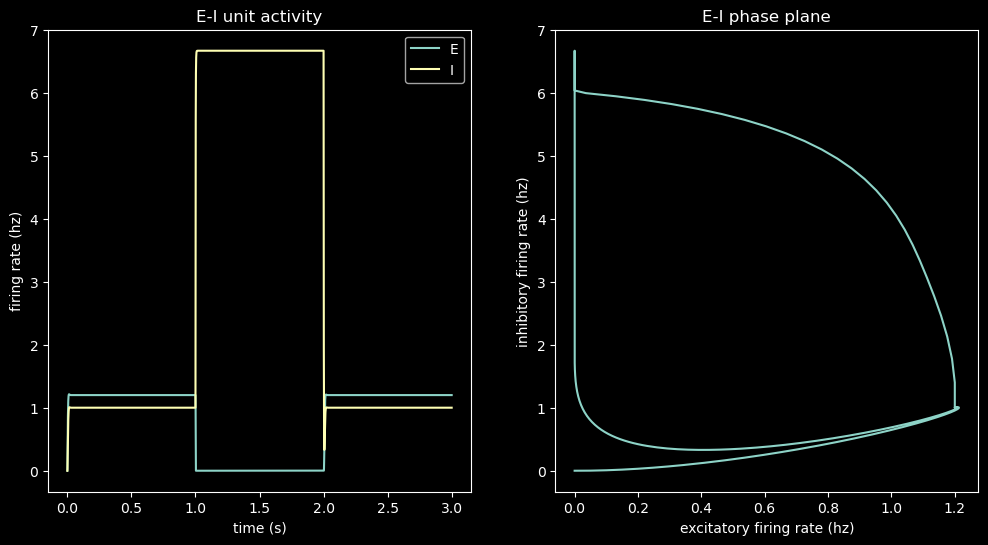

In [40]:
plot_activity(r_e, r_i)

- increasing applied current to inhibitory unit increases inhibitory hz and excitatory hz drops to 0

## 2. 
- simulate system with increased baseline current:
- $I_E^{(base)} = $ 25
- $I_I^{(base)} = $ 15

In [53]:
# set up currents
i_e_base = 25
i_i_base = 15
i_i_stim = 20
i_e_app = np.zeros_like(t) + i_e_base
i_i_app = np.zeros_like(t) + i_i_base
i_i_app[10000:20000] += i_i_stim


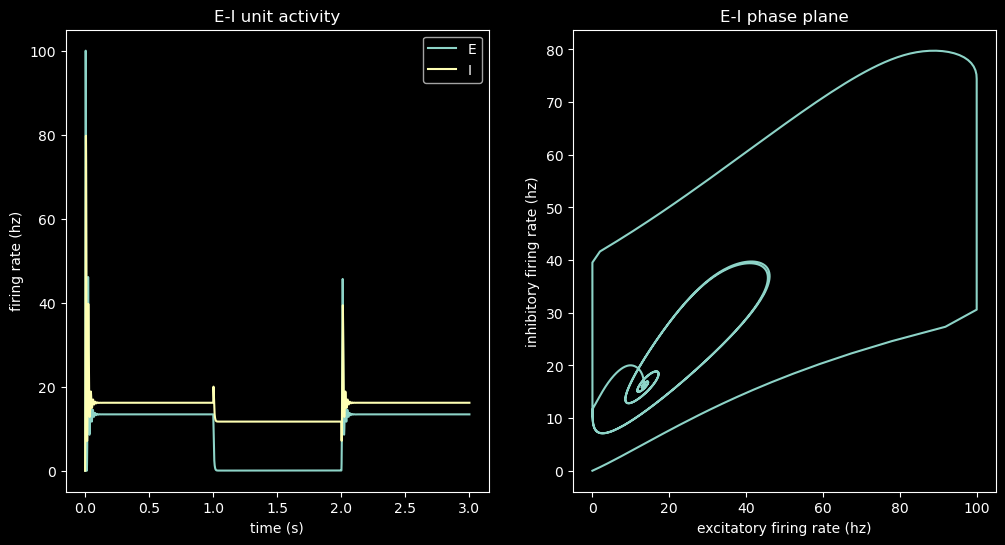

In [54]:
r_e, r_i = simulation(i_e_app, i_i_app)
plot_activity(r_e, r_i)

- increasing baseline currents sets higher baseline hz for both units
- increasing applied current to inhibitory unit decreases hz for both units
- excitatory unit decreases more
- removing applied current to inhibitory unit returns to baseline (spiral in phase plane)

## 3. repeat q1 with altered time constants
- $\tau_e = 2$ ms
- $\tau_i = 10$ ms


In [55]:
# time vector
tmax = 3
dt = 0.1e-3
t = np.arange(0, tmax, dt)

# current params 
i_e_base = 0
i_i_base = 0
i_i_stim = 20

# current vectors 
i_e_app = np.zeros_like(t)
i_i_app = np.zeros_like(t)
i_i_app[10000:20000] += i_i_stim

# other params
tau_e = 2e-3
tau_i = 10e-3
r_max = 100
theta_e = -5
theta_i = 0
alpha_e = 0.05
alpha_i = 1
w_ee = 2
w_ei = 2.5
w_ie = -2.5
w_ii = -2

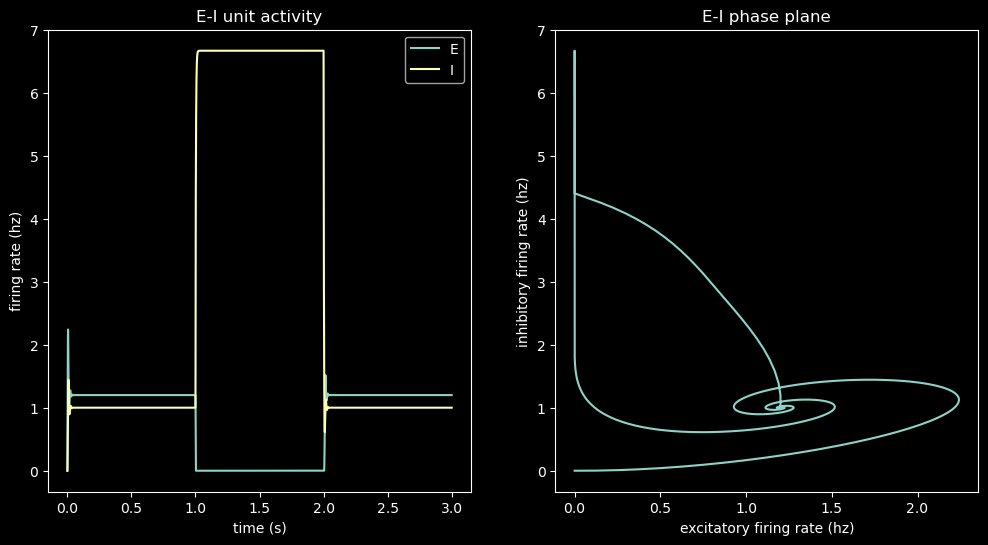

In [56]:
r_e, r_i = simulation(i_e_app, i_i_app)
plot_activity(r_e, r_i)

- altered time constants look almost identical in hz/time plot
- phase plane very different, has attractor spiral at ~1hz

## 4. repeat q2  with altered time constants
- $\tau_e = 2$ ms
- $\tau_i = 10$ ms

In [57]:
# time vector
tmax = 3
dt = 0.1e-3
t = np.arange(0, tmax, dt)

# set up currents
i_e_base = 25
i_i_base = 15
i_i_stim = 20
i_e_app = np.zeros_like(t) + i_e_base
i_i_app = np.zeros_like(t) + i_i_base
i_i_app[10000:20000] += i_i_stim


# other params
tau_e = 2e-3
tau_i = 10e-3
r_max = 100
theta_e = -5
theta_i = 0
alpha_e = 0.05
alpha_i = 1
w_ee = 2
w_ei = 2.5
w_ie = -2.5
w_ii = -2

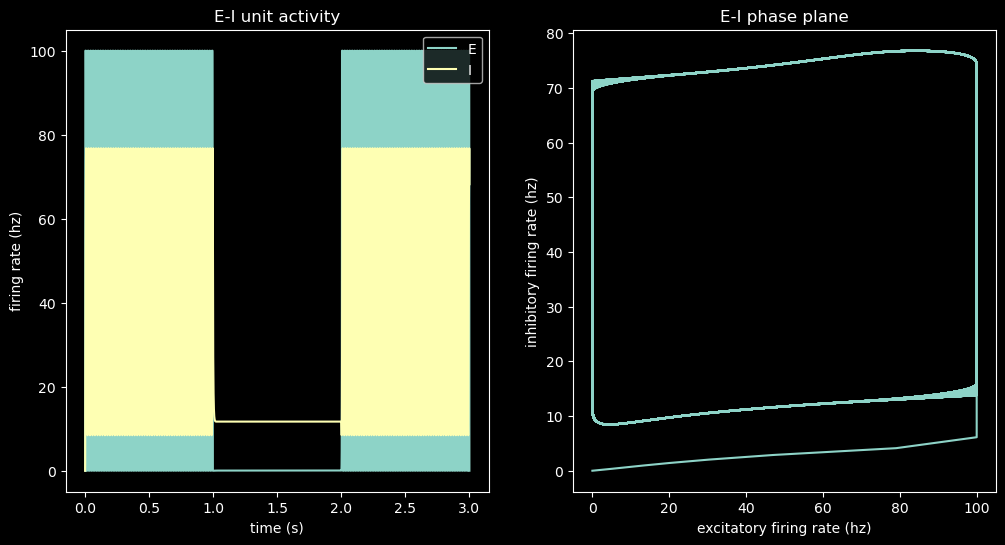

In [58]:
r_e, r_i = simulation(i_e_app, i_i_app)
plot_activity(r_e, r_i)

- higher baseline current with altered time constants is unstable until more current is applied to inhibitory cell

# Part B
- duplicate the circuit of part A so that there are two independent pairs, each comprising one excitatory and one inhibitory unit
- add two connections between the pairs, from excitatory unit of each pair to inhibitory unit of the other pair
- $W_{EI-X} = $ 1.75

### 5.
- simulate system for 3s, applying $I_I^{(app)} = $ 10 to the first inhibitory unit for 100m at 1s
- apply same pulse to second inhibitory unit for 100ms at 2s

- set $I_E^{(base)}$ = 25 and $I_I^{(base)}$ = 20
- $\tau_E = \tau_I = 5$ ms

In [111]:
# time vector
tmax = 3
dt = 0.1e-3
t = np.arange(0, tmax, dt)

# set up currents
i_e_base = 25
i_i_base = 20
i_i_stim = 10
# same for both units
i_e_app = np.zeros_like(t) + i_e_base
# for each unit
i_i_app_1 = np.zeros_like(t) + i_i_base
i_i_app_2 = np.zeros_like(t) + i_i_base

i_i_app_1[10000:11000] += i_i_stim
i_i_app_2[20000:21000] += i_i_stim


# other params
tau_e = 5e-3
tau_i = 5e-3
r_max = 100
theta_e = -5
theta_i = 0
alpha_e = 0.05
alpha_i = 1
w_ee = 2
w_ei = 2.5
w_ie = -2.5
w_ii = -2
w_ei_x = 1.75

In [78]:
# update_e remains the same (no external input)

def update_i1(r_e1, r_i1, r_e2, i_i_app_1):
    i_i = w_ei * r_e1 + w_ii * r_i1 + w_ei_x * r_e2 + i_i_app_1
    return (-r_i1 + alpha_i * (i_i - theta_i)) / tau_i

def update_i2(r_e2, r_i2, r_e1, i_i_app_2):
    i_i = w_ei* r_e2 + w_ii * r_i2 + w_ei_x * r_e1 + i_i_app_2
    return (-r_i2 + alpha_i * (i_i - theta_i)) / tau_i

In [125]:
def reset_currents():
    global i_i_app_1, i_i_app_2, i_e_app
    # set up currents
    i_e_base = 25
    i_i_base = 20
    i_i_stim = 10
    # same for both units
    i_e_app = np.zeros_like(t) + i_e_base
    # for each unit
    i_i_app_1 = np.zeros_like(t) + i_i_base
    i_i_app_2 = np.zeros_like(t) + i_i_base

    i_i_app_1[10000:11000] += i_i_stim
    i_i_app_2[20000:21000] += i_i_stim

In [113]:
def simulate_coupled(i_e_app, i_i_app_1, i_i_app_2, sigma=0):

    # initialize firing rate arrays
    r_e1 = np.zeros_like(t)
    r_e2 = np.zeros_like(t)
    r_i1 = np.zeros_like(t)
    r_i2 = np.zeros_like(t)

    # simulate over time
    for i in range(1, len(t)):
        # get noise 
        if sigma != 0:
            noise = np.random.randn() * sigma * np.sqrt(dt)
            i_e_app[i - 1] += noise
            i_i_app_1[i - 1] += noise
            i_i_app_2[i - 1] += noise
        
        r_e1[i] = r_e1[i - 1] + (update_e(r_e1[i - 1], r_i1[i - 1], i_e_app[i - 1]) * dt)
        r_e2[i] = r_e2[i - 1] + (update_e(r_e2[i - 1], r_i2[i - 1], i_e_app[i - 1]) * dt)
        r_i1[i] = r_i1[i - 1] + (update_i1(r_e1[i - 1], r_i1[i - 1], r_e2[i - 1], i_i_app_1[i - 1]) * dt)
        r_i2[i] = r_i2[i - 1] + (update_i2(r_e2[i - 1], r_i2[i - 1], r_e1[i - 1], i_i_app_2[i - 1]) * dt)

        # enforce rate conditions
        r_e1[i] = min(r_max, max(0, r_e1[i]))
        r_e2[i] = min(r_max, max(0, r_e2[i]))
        r_i1[i] = min(r_max, max(0, r_i1[i]))
        r_i2[i] = min(r_max, max(0, r_i2[i]))
    
    return r_e1, r_e2, r_i1, r_i2


In [87]:
def plot_dual_activity(r_e1, r_i1, r_e2, r_i2):
    """
    Plots firing rates of two E-I pairs as a function of time and as phase plane
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # firing rates over time
    ax[0].plot(t, r_e1, label='E1')
    ax[0].plot(t, r_i1, label='I1')
    ax[0].plot(t, r_e2, label='E2')
    ax[0].plot(t, r_i2, label='I2')    
    # ax[0].axvspan(1, 2, color='gray', alpha=0.1, label='applied current')
    ax[0].legend(loc='upper right')
    ax[0].set_xlabel('time (s)')
    ax[0].set_ylabel('firing rate (hz)')
    ax[0].set_title('E-I unit activity')

    ax[1].plot(r_e1, r_i1, label='pair 1')
    ax[1].plot(r_e2, r_i2, label='pair 2')
    ax[1].set_xlabel('excitatory firing rate (hz)')
    ax[1].set_ylabel('inhibitory firing rate (hz)')
    ax[1].set_title('E-I phase plane')
    ax[1].legend(loc='upper right')

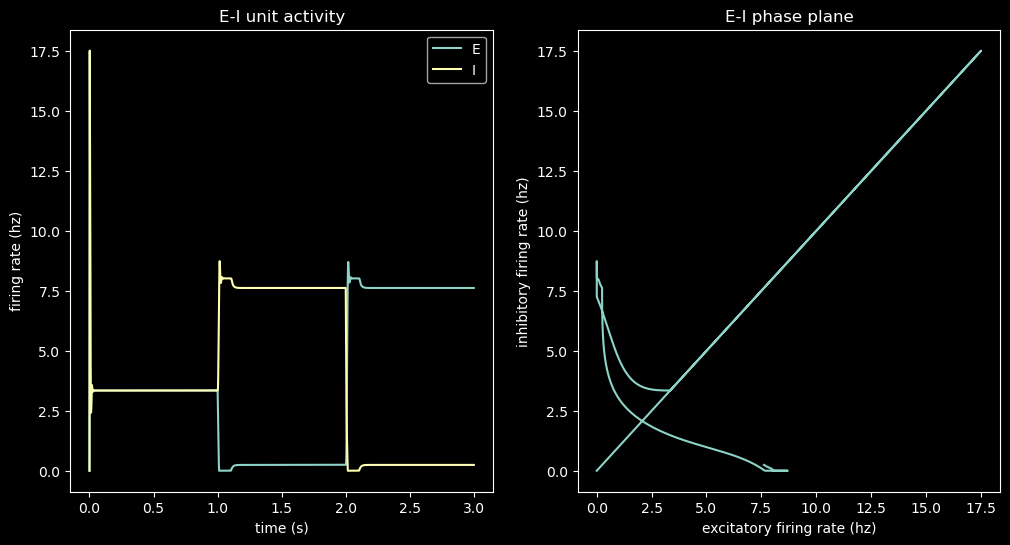

In [126]:
reset_currents()

r_e1, r_i1, r_e2, r_i2 = simulate_coupled(i_e_app, i_i_app_1, i_i_app_2)
plot_activity(r_e1, r_i1)

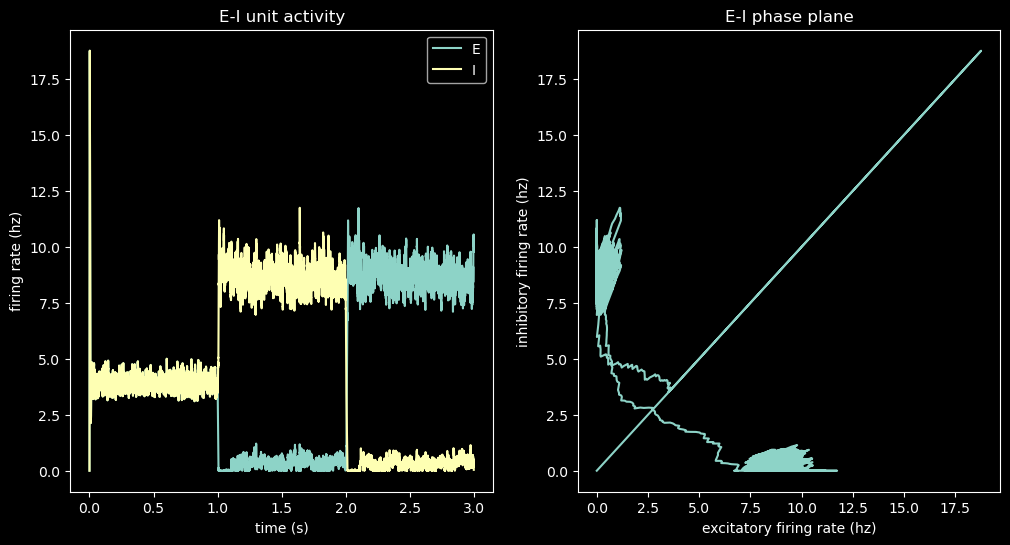

In [128]:
# with noise
reset_currents()
r_e1, r_i1, r_e2, r_i2 = simulate_coupled(i_e_app, i_i_app_1, i_i_app_2, sigma=500)
plot_activity(r_e1, r_i1)

- 3 (?) stable states:
    - (4, 4)
    - (0, 8)
    - (8, 0)

- more movement around the stable states when current is added (see phase plane)

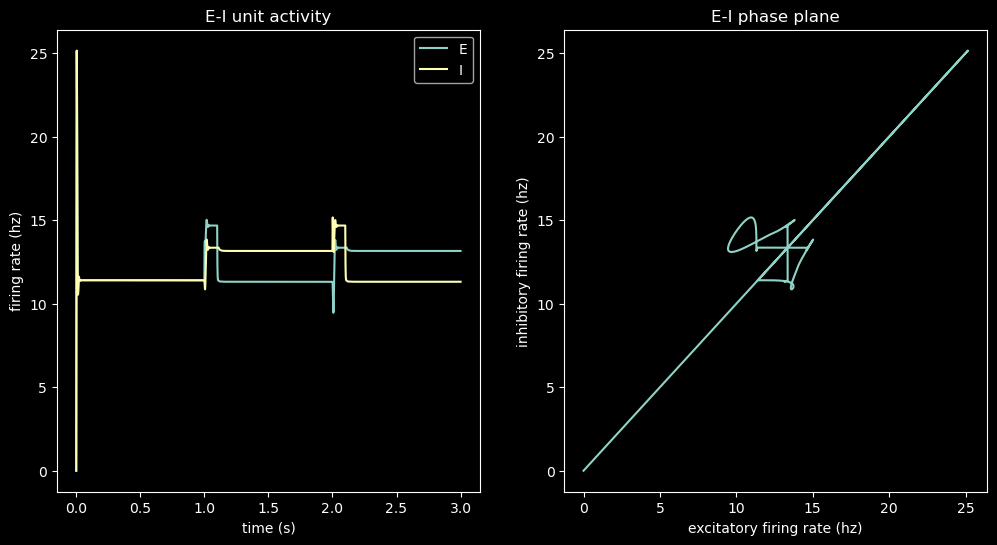

In [139]:
reset_currents()
r_e1, r_i1, r_e2, r_i2 = simulate_coupled(i_e_app, i_i_app_1, i_i_app_2)
plot_activity(r_e2, r_i2)

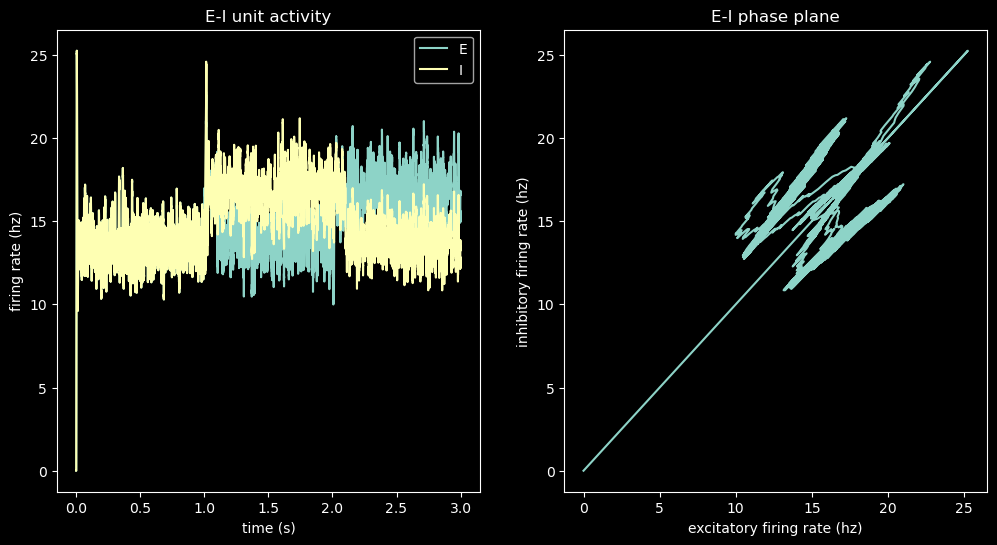

In [145]:
# with noise
reset_currents()
r_e1, r_i1, r_e2, r_i2 = simulate_coupled(i_e_app, i_i_app_1, i_i_app_2, sigma=1000)
plot_activity(r_e2, r_i2)

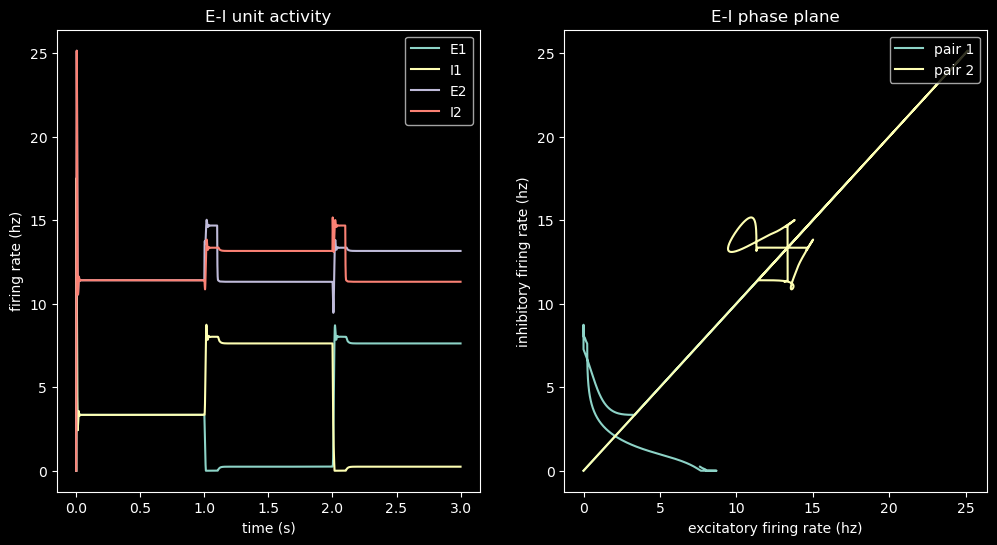

In [138]:
reset_currents()
r_e1, r_i1, r_e2, r_i2 = simulate_coupled(i_e_app, i_i_app_1, i_i_app_2, sigma=0)
plot_dual_activity(r_e1, r_i1, r_e2, r_i2)

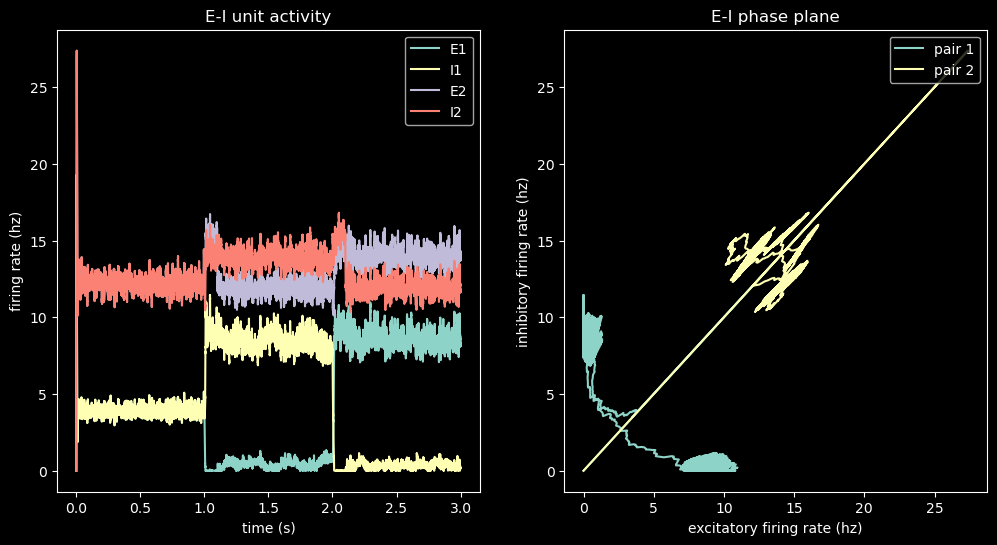

In [147]:
reset_currents()
r_e1, r_i1, r_e2, r_i2 = simulate_coupled(i_e_app, i_i_app_1, i_i_app_2, sigma=500)
plot_dual_activity(r_e1, r_i1, r_e2, r_i2)

**initial activity**
- all units spike sharply before stabilizing firing rates
- unit 1 is stable at lower firing rate (~4hz)
- unit 2 is stable at higher firing rate (~12hz)

**first pulse**
- pulse is to inhibitory unit 1
- both inhibitory units increase firing rate, though unit 1 goes higher  
- excitatory unit 1 goes to 0
- excitatory unit 2 also decreases firing rate (obvious result of less input from E1)

**second pulse**
- pulse to inhibitory unit 2
- inverse results of first pulse (!)
- inverse because unit 2 inhibitory unit activity _quickly_ increases, leading to quick self-inhibition, therefore increase in unit 2 excitatory activity
- increased unit 2 excitatory activity increased unit 1 inhibition _quickly_ enough to self-inhibit and subsequently increase unit 1 excitatory activity
- remains at stable point because it was close enough to it in phase-space? 

**phase plane**
- both phase planes are symmetric across y=x, and this is quite clear from the hz/time plot
- pair 1
    - trends towards high inhibitory (low excitatory) activity point (corresponding to I1 pulse)
    - trends towards high excitatory (low inhibitory) activity point (corresponding to I2 pulse)

- pair 2
    - sustained high-activity points
    - initial trend to high inhibitory (slightly lower, but still high excitatory) activity point 
    - then trends to higher excitatory (symmetrically lower, but still high inhibitory) activity point

